In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### value noise
We start with a function ${f_1}$ that takes an integer ${x}$ and produces a value ${v}$ so that $0 \le v \le 1$. First, we need a seeded table ${r}$ of random values between 0 and 1:

In [17]:
r = np.random.ranf(4)

Actually, lets define a `seed` function that initializes this table with using a seed number and and sample size:

In [18]:
def seed(n, size=4):
    global r
    np.random.seed(n)
    r = np.random.ranf(size)

And now we can define ${f_1}$ using this table:

def f1(x):
    x = int(x % len(r))
    return r[x]

seed(0, 4)
x = np.linspace(0, 15, 16)
y = [f1(x) for x in x]
plt.plot(x, y, 'bo')

With a small ${r}$ table we also get a very small period. You can see that ${f_1}$ repeats every 4 units along the x-axis. Let's fix this by re-seeding ${r}$ with more samples.

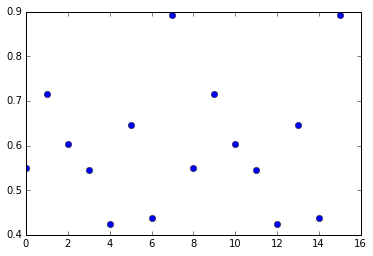

In [24]:
seed(0, 8)
y = [f1(x) for x in x]
plt.plot(x, y, 'bo')

Which already looks a lot more random. Now we repeat every 8 units along the x-axis. We will get back to the amount of samples later, for now well keep it small to make things more manageable.

We're also deliberately plotting the function as dots instead of a continuous line because we still haven't figured out how to, for example sample noise at position 0.5 along the x-axis. Up until now we have only been dealing with integers such as 0, 1, 3 etc.

### linear interpolation
If we have two values ${v_0} = 2$ and ${v_1} = 5$ we can perform a linear interpolation between them. An easy way to start visualizing this is to start drawing a line between $(0, 2)$ and $(1, 5)$.

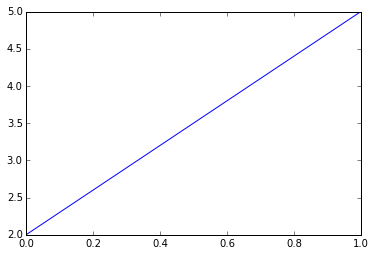

In [30]:
v0 = 2
v1 = 5
plt.plot([0,1], [v0,v1])

Now let's say we want to find out what the ${y}$ value is for when ${x} = 1/3$. Let's consider this line for a moment, we notice it starts at ${y} = 2$ where ${x} = 0$. So let's start with a function ${f_1}$ that describes this:

${f_1}(x) = x + 2$

This will work for when ${x} = 0$ but not for when ${x} = 1$:

${f_1}(0) = 0 + 2 = 2$

${f_1}(1) = 1 + 2 = 3$

We need something else so that when we invoke ${f_1}(1)$ we get a result of 5. In order to find out how much, we need to find out the difference between ${v_0}$ and ${v_1}$ first. We do this by substracting ${v_0}$ from ${v_1}$ so $\delta{v} = {v_1} - {v_0}$ which is $5 - 2 = 3$. This means that when ${x} = 1$ we need to add 3. When ${x} = 0$ we need to add 0. So considering $0 \le x \le 1$ we can say that we need to add $\delta{v}{x}$ along the way to ${f_1}$ in order to get to our destination which leads us to ${f_1}(x) = 3x + 2$:

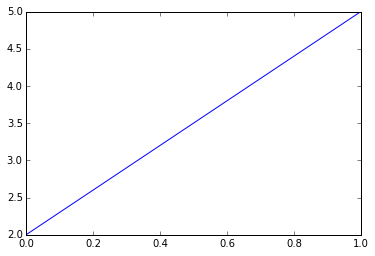

In [41]:
def f1(x): return 3 * x + 2
x = np.linspace(0, 1, 10)
y = [f1(x) for x in x]
plt.plot(x, y)

It would be nice to have a more generic version of this function. This is pretty easy though:

${f_2}(v0, v1, vt) = v0 + (v1 - v0)t$

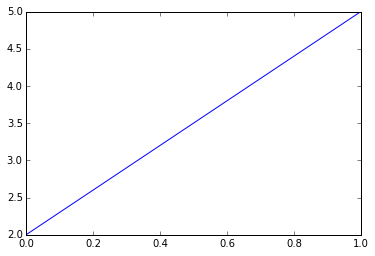

In [38]:
def f2(v0, v1, t):
    return v0 + (v1 - v0) * t

y = [f2(v0, v1, t) for t in x]
plt.plot(x, y)

In theory we now could use any ${v_0}$ and ${v_1}$ and interpolate between them. Let's try ${v_0} = -3$ and ${v_1} = 2$:

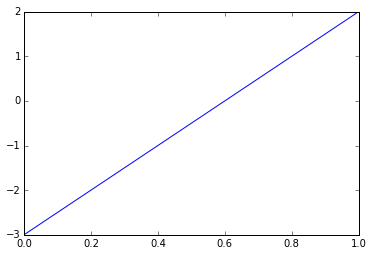

In [46]:
v0, v1 = -3, 2
y = [f2(v0, v1, t) for t in x]
plt.plot(x, y)

So 